 # <font size=5 color=#00b3b3>Data Analysis of The Movie DataBase (TMDb)</font>



## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#sources">Data Sources</a></li>
    <li><a href="#gathering">Data Gathering</a></li>
    <li><a href="#overview">Data Overview And Define The Observations</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#analysis">Exploratory and Explantory</a></li>
    <li><a href="#conclusion">Conclusion and Limitations</a></li>
</ul>

<a id='intro'></a>
<h1> Introduction</h1>

<p style="font-size:100%;color:#811F86"><strong>  Every year hundreds of movies get released but not all of them are successful. The aim of the project is to analyze the TMDB movie dataset which has details about the movies, their production cost and revenue generated along with rating inforamtion.I am going to gather and analyze data  <a href = "https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv">"TMDb movie"</a>. For that, data is gathered via manual download. After that I am going to wrangle , anlayze(exploratory and explantory),and make conclusion for this data.We are trying to analyze the dataset to find answers to the questions posed below.<br> We will start with a univariate analysis and then move ahead with a mutivariate analysis to understand the impact of certain factors in determining the success of the movie.</strong></p>
<p style="font-size:100%;color:#811F86"><b><u>The success of a movie could be measured in terms of the following metrics:</u></b></p>
   
<p style="font-size:100%;color:#3E8A10"><strong>a- Return on Investment: which will be a measure of the profit generated for movies.</strong></p>
<p style="font-size:100%;color:#3E8A10"><strong>b- Rating by Public: which will also take into account the number of votes posted for </strong></p>

<p style="font-size:100%;color:#330703"><strong> Based on successful metrics mention above ,we will  try to answer the following questions:</strong></p>

<ol style="font-size:100%;color:#207863"> <strong><li>Which three of genres of movies are the most  productive between 1960 and 2015?</li><li>Which three of genres of movies achieved the most total profit  between 1960-2015?</li><li>I3- Which three of genres of movies achieved the most total voting public between 1960-2015?</li><li>When did  the highest release of movies happen?</li><li>Is there a releationship between voting public and profit for genres of movies?</li><li>Which genres of movies achieved the most likely total profit in the  period which achieved the most total profit of all movies?</li><li>Which genre of movies achieved the most likely total voting count in the  period which achieved the most total voting count of all movies?</li></strong></ol>


<a id='sources'></a>
## Data Sources
>TMDb movie (tmdb-movies.csv)</li>
><ul>   
>    <li><b>Source:</b> <a href = "https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv">collected fromThe Movie Database (TMDb)</a></li>    
>    <li><b>Method of gathering:</b> Manual download</li>
></ul>

<a id='gathering'></a>
## Data Gathering

#### TMDb movie (tmdb-movies.csv)


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import seaborn as sb
from sklearn import linear_model
from datetime import datetime
from timeit import default_timer as timer


# At first I downloaded the file from TMDb movie . Now the file can be loaded directly from my local disk into a dataframe via Pandas:
df=pd.read_csv('C:/Users/toshiba/Desktop/Data Analysis nanodegree/Chapter 5/project/tmdb-movies.csv')

<a id='overview'></a>
## Data Overview And Define The Observations

In [2]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<h1 style="font-size:140%;color:#3A0101"> Define The Observations</h1>
<p style="font-size:120%;color:darkblue"><strong>The dataset has 10866  rows and 21 columns,it contains information about movies collected from The Movie Database (TMDb), including:</strong></p>

<ol style="font-size:100%;color:#0B5345"> <strong><li>id : index number in dataset</li><li>imdb_id: IMDb Site index</li><li>popularity: rating of a particular title on IMDb indicates</li>         
<li>budget : cost of movie (thousand million)</li>              
<li>revenue: revenue of movie (thousand million)</li>               
<li>original_title : the movie name</li>       
<li>cast: the group of actors who make up a movie</li>               
<li>homepage: website the movie</li>   
<li>director:  who controls the making of a film and supervises</li>              
<li>tagline: a short text which serves to clarify an idea for, or is designed with a form of, dramatic effect</li>             
<li>keywords: is a word (or group of connected words) attached to a title  describe any notable object, concept, style or action</li>            
<li>overview:  is a brief summary that gives audiences an idea of what a movie is about </li>           
<li>runtime: the amount of time that a movie lasts from beginning to end.</li>              
<li>genres: categories that define a movie based on its narrative elements, each genre is unique in the types of stories they tell</li>               
<li>production_companies: are a business that provide the physical basis for works in the fields of performing movies</li>  
<li>release_date: is when a completed movie is released for the public</li>          
<li>vote_count : rating by public </li>          
<li>vote_average: the average rating by public</li>          
<li>release_year: is when a completed movie is released for the public </li>          
<li>budget_adj: cost of movie (thousand million), associated movie in terms of 2010 dollars,accounting for inflation overtime.</li><li>revenue_adj :revenue of movie (thousand million) ,associated movie in terms of 2010 dollars,accounting for inflation overtime.</li></strong></ol>            



<a id='wrangling'></a>
## Data Wrangling


## <font size=4 color = '3A0101'> Data Assessing
 <font size=4 color = '3A0101'> Now we are going to look for issues with the quality or the tidiness of the data and its dimensions.</font>

#### <font color='blue' size= 3>1- Let's  look for missing data.</font> 

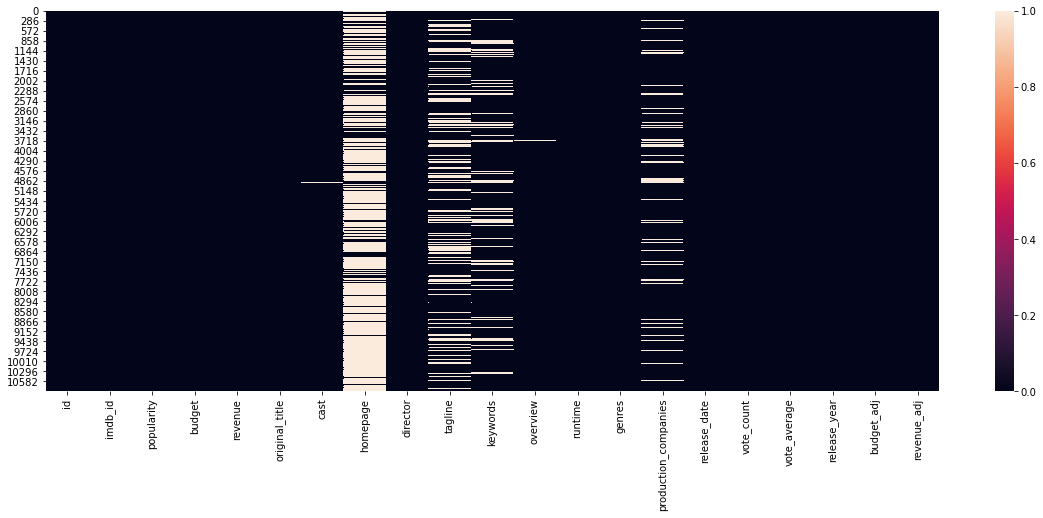

In [5]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df.isnull(), vmin=0, vmax = 1)

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
df.sample(50)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1803,32084,tt1483831,0.140860,0,0,Lebanon,Oshri Cohen|Michael Moshonov|Yoav Donat|Itay T...,NaN,Samuel Maoz,NaN,...,"June, 1982 - The First Lebanon War. A lone tan...",93,Drama|War,Paralite Productions Ltd.|Israeli Film Fund|To...,10/10/09,24,6.0,2009,0.000000e+00,0.000000e+00
5923,241287,tt3384034,0.107333,0,0,Tropico,Lana Del Rey|Shaun Ross,NaN,Anthony Mandler,NaN,...,"""Tropico"" is a short film by Lana Del Rey. It'...",27,Music|Drama|Fantasy|Romance,NaN,12/5/13,24,8.4,2013,0.000000e+00,0.000000e+00
1768,25405,tt1019454,0.118447,0,0,Taking Chance,Kevin Bacon|Tom Aldredge|Nicholas Art|Blanche ...,http://www.hbo.com/movies/taking-chance/index....,Ross Katz,"When one falls, another brings him home.",...,"Lt. Col. Michael Strobl, a volunteer military ...",77,Drama|History|War,Motion Picture Corporation of America,9/21/09,17,6.7,2009,0.000000e+00,0.000000e+00
7609,14123,tt0804452,0.395397,0,0,Bratz,Logan Browning|Janel Parrish|Nathalia Ramos|Sk...,NaN,Sean McNamara,NaN,...,The popular Bratz dolls come to life in their ...,110,Comedy,NaN,8/3/07,30,5.9,2007,0.000000e+00,0.000000e+00
8275,10437,tt0104940,0.687197,0,27281507,The Muppet Christmas Carol,Michael Caine|Don Austen|Meredith Braun|Don Au...,NaN,Brian Henson,NaN,...,A retelling of the classic Dickens tale of Ebe...,85,Comedy|Family|Fantasy|Drama,"Walt Disney Pictures|Jim Henson Company, The",12/10/92,96,7.1,1992,0.000000e+00,4.239612e+07
1657,26963,tt0485601,0.374157,0,0,The Secret of Kells,Evan McGuire|Brendan Gleeson|Liam Hourican|Mic...,http://www.thesecretofkells.com/,Tomm Moore|Nora Twomey,Turn the darkness into light,...,Adventure awaits 12 year old Brendan who must ...,75,Animation|Family|Fantasy,GÃ©bÃ©ka Films|Cartoon Saloon,2/9/09,108,7.1,2009,0.000000e+00,0.000000e+00
1723,16440,tt1295071,0.292125,0,0,Tales of the Black Freighter,Gerard Butler,NaN,Mike Smith|Daniel DelPurgatorio,NaN,...,A mariner survives an attack from the dreaded ...,26,Animation|Horror|Action,Warner Premiere,3/24/09,25,6.7,2009,0.000000e+00,0.000000e+00
377,357681,tt4973112,0.198522,0,0,Hitting the Apex,Brad Pitt|Valentino Rossi|Jorge Lorenzo|Casey ...,http://hittingtheapexfilm.com/,Mark Neale,NaN,...,'Hitting the Apex' is the inside story of six ...,138,Documentary,First Movie Companie,9/2/15,14,8.0,2015,0.000000e+00,0.000000e+00
5306,11365,tt0120514,0.619612,0,0,Wilde,Stephen Fry|Jude Law|Vanessa Redgrave|Jennifer...,http://www.oscarwilde.com/,Brian Gilbert,Loved for being unique. Hated for being differ...,...,"The story of Oscar Wilde, genius, poet, playwr...",118,Drama|History,NaN,9/1/97,21,6.0,1997,0.000000e+00,0.000000e+00
557,330037,tt3802576,0.099678,0,0,Brothers,Akshay Kumar|Sidharth Malhotra|Jackie Shroff|J...,http://en.wikipedia.org/wiki/Brothers_(2015_film),Karan Malhotra,Blood Against Blood,...,"Brothers is an upcoming Hindi film, directed b...",156,Family|Action|Drama,Dharma Productions,8/14/15,20,6.3,2015,0.000000e+00,0.000000e+00


In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### During the visual assessment we can observe that:


- There is a lot of missing data in the columns , we have to drop them later.
- The dataset doesn't cotain profit coulmn , so we have to create later new column that contains profit of movies (revenue column-budget column).
- In budget,revenue,runtime,budget_adj and revenue_adj columns, their minimum observations are zero, I understand movie sometimes does not achieve revenue, but it is not plausible  that  budget and runtime are zero, we have to drop zero later.
- Many movies are a mix of different type of genres,we have to create new dataset later contains the one genre for each movie.

#### <font color='blue' size= 3> 2-Let's look for the datatypes for each columns in dataset  if they are correct or not.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Perfect. We do not need to change datatype of any columns .

####  <font color='blue' size=3>3-Let's see if the dataset has duplicated or not.</font>

In [10]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [11]:
df[(df.id==42194)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


***We observe from above that there is dublicated rows, and it is has the same values ,so we drop it in cleaning section.***



## <font size=4 color = '3A0101'>Assessing Summary


### Quality
 
 <font size = 3 color='blue'> 

- There is a lot of missing data in some columns.
- In some columns, it is not plausible there contain zero value.
- The dataset has duplicated rows.    

### Tidiness
 
 <font size = 3 color='blue'> 
- Create new column that contains the profit of movies.
- Create new dataset that contains genre for each movie.

## <font size=4 color = '3A0101'>Data Cleaning

### `Cleaning steps:`

 <font size = 4 color='purple'>

1-Removing the duplicated rows.
        
2- Drop missing data.
        
3- Drop zero values.        
    
4- Create new column that contains the profit of movies.
  
5- Create new dataset that contains genre for each movie.    

    

#### 1-Removing the duplicated rows

In [13]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

0

#### 2- Drop missing data.

In [14]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

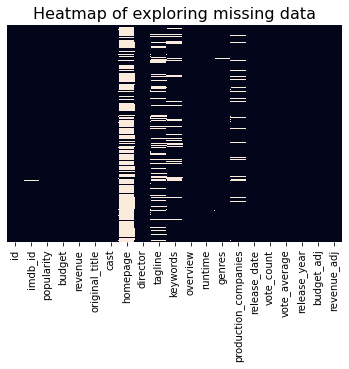

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,color='#6C0BAC')
plt.title('Heatmap of exploring missing data', fontsize=16);

#### For analysis purposes in our project, we just need  drop missing data from genres column, revenue, runtime,popularity, budget and released year columns have no missing data we need them in our analysis,while  remaining columns they have missing data and they don't including in our analysis.In order to check more accuracy, we don't  drop missing data from them.

In [20]:
#we just need  drop missing data from genres colunm:
df.dropna(subset=['genres'],inplace=True)

In [21]:
df.isnull().sum()

id                         0
imdb_id                    8
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      75
homepage                7911
director                  42
tagline                 2806
keywords                1475
overview                   3
runtime                    0
genres                     0
production_companies    1016
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### 3- Drop zero values.</font> 
    
***Let's check by using .decribe() function.***  

In [22]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,65870.675521,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,91981.355752,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10589.250000,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20557.000000,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75186.000000,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


 I understand that it is possible the revenue is 0 "revenue=profit+cost", but it is not plausible that runtime , budget equal zero!
 So we will drop zero from columns budget,budget_adj,and runtime :</font>

In [23]:
# Some columns have zero values ,so we drop zeros:
df.drop(df.loc[df['budget']==0].index, inplace=True)
df.drop(df.loc[df['budget_adj']==0].index, inplace=True)
df.drop(df.loc[df['runtime']==0].index, inplace=True)

#### 4- Create new column it contains profit of movies.  

In [24]:
df['profit']=df['revenue']-df['budget']

In [25]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,5165.000000,5165.000000,5.165000e+03,5.165000e+03,5165.000000,5165.000000,5165.000000,5165.000000,5.165000e+03,5.165000e+03,5.165000e+03
mean,45482.058277,0.992951,3.076120e+07,8.035319e+07,107.165344,408.951016,6.033688,2001.253824,3.691521e+07,1.022744e+08,4.959199e+07
std,72678.125317,1.329624,3.891166e+07,1.595326e+08,22.666728,788.546168,0.882502,11.771516,4.196662e+07,1.959746e+08,1.351773e+08
min,5.000000,0.001117,1.000000e+00,0.000000e+00,4.000000,10.000000,1.500000,1960.000000,9.210911e-01,0.000000e+00,-4.139124e+08
25%,8840.000000,0.348223,6.000000e+06,0.000000e+00,93.000000,36.000000,5.500000,1996.000000,8.108664e+06,0.000000e+00,-6.600000e+06
50%,13001.000000,0.625020,1.700000e+07,2.101150e+07,103.000000,122.000000,6.100000,2005.000000,2.274082e+07,2.877829e+07,2.547569e+06
75%,44943.000000,1.152937,4.000000e+07,8.951977e+07,117.000000,402.000000,6.600000,2010.000000,5.008384e+07,1.134483e+08,5.291317e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,540.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09


In [26]:
df.shape

(5165, 22)

<p style="font-size:120%;color:#B9770E"><strong>After removing missing values,zero values,duplicated values, and adding columns in dataset,the number of columns become <u>22</u> and the number of rows become <u>5165</u> </strong> </p>

####  5- Create new dataset that contains genre for each movie.

Because many movies are a mix of different type of genres,we use .str.split() method with.explode() method to create dataframe called "df_genre" to create row each genre in genres :

In [27]:
df_genre=df.assign(genres=df['genres'].str.split('|')).explode('genres')
df_genre.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354


In [28]:
# shows the original dataset to make compairing :
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


We observe that every genre has the same value, for example the movie "Jurassic World" have four types of genre and every genre of that movie is taken  the same profit=1316249360, and the same vote_count,=5562(profit,vote_count are subjects our project),so we divide the values by the number  genres of each movie: 

In [29]:
df_num_genres_movie= pd.DataFrame(df_genre['id'].value_counts(sort=False).reset_index())
df_num_genres_movie.rename(columns = {'id':'number of genres each movie','index':'id'}, inplace = True)
df_num_genres_movie=df_num_genres_movie.sort_values(by=['id'])
df_num_genres_movie

,id,number of genres each movie
3256,5,1
1953,11,3
3622,12,2
3259,13,3
3910,14,1
...,...,...
3229,360387,2
1153,362105,2
728,395560,4
865,414419,2


Again recreate new dataset that contains genre for each movie and distribute profit and vote_count(subject  our project)  equally for each genre(we assume the distribution is equal): 

In [30]:

n=list()
for j in list(df_num_genres_movie['number of genres each movie']):
    n.append(j)

df_original=df.copy()
df_original=df.sort_values(by=['id'])
df_original['profit']=df_original['profit']/n
df_original['vote_count']=df_original['vote_count']/n

df_genre=df_original.assign(genres=df_original['genres'].str.split('|')).explode('genres')
df_genre.query('original_title=="Jurassic World"')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,1390.5,6.5,2015,1.379999e+08,1.392446e+09,340882202.5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,1390.5,6.5,2015,1.379999e+08,1.392446e+09,340882202.5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,1390.5,6.5,2015,1.379999e+08,1.392446e+09,340882202.5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,1390.5,6.5,2015,1.379999e+08,1.392446e+09,340882202.5


We will use dataset(df) and dataset(df_genre) in Exploratory section.

<a id='analysis'></a>

## Exploratory and Explantory

We will try answer the following questions:

1- Which three of genres of movies are the most  productive between 1960 and 2015?

2- Which three of genres of movies achieved the most total profit  between 1960-2015?

3- Which three of genres of movies achieved the most total voting public between 1960-2015?

4- When did  the highest release of movies happen?

5-Is there a releationship between  voting public and profit for genres of movies?

6-Which genres of movies achieved the most likely total profit in the  period which achieved the most total profit of all movies?

7-Which genre of movies achieved the most likely total voting count in the  period which achieved the most total voting count of all movies?
     
     



Let's start exploring and explaining our questions based on successful metrics mention on introduction.



Based on successful metrics: return on investment and rating by public, by Exploring our dataset,we will try to answer the following questions:

1- Which three of genres of movies are the most  productive between 1960 and 2015?

### Let's explore visually distribution of genre of movies :


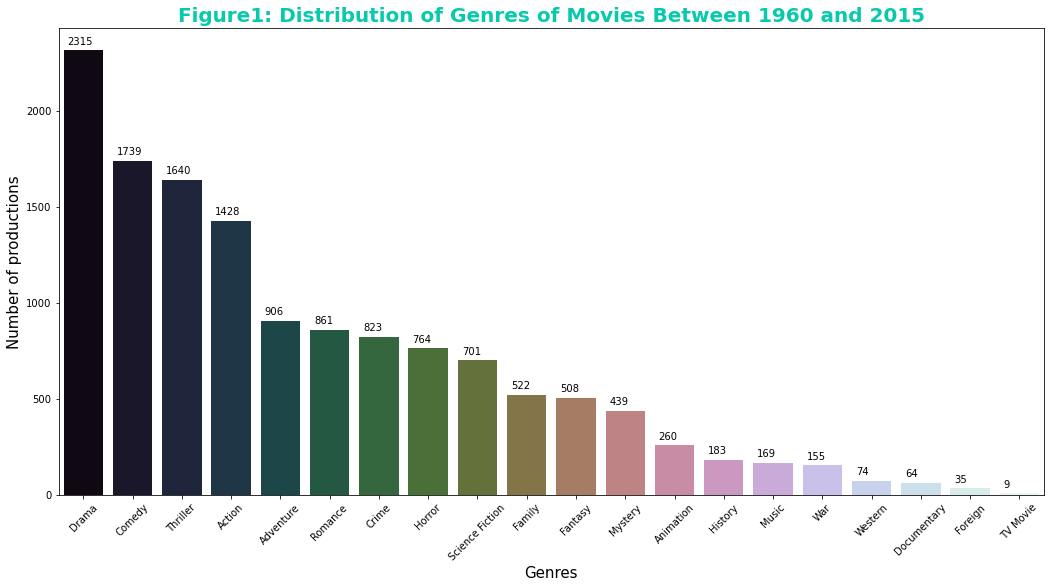

In [31]:
fig, ax = plt.subplots(figsize = (14.70,8.27))
cat_order = df_genre['genres'].value_counts().index
sns.countplot(data = df_genre, x = 'genres', palette = "cubehelix", order = cat_order)
plt.xticks(rotation =45 )
ax.set_title('Figure1: Distribution of Genres of Movies Between 1960 and 2015',fontweight='bold',color='#07C9AC',fontsize=20)
plt.xlabel('Genres', fontsize=15)
plt.ylabel("Number of productions", fontsize=15)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.08, p.get_height()+30))
plt.tight_layout();

In [9]:
df_genre['genres'].value_counts()

Drama              2315
Comedy             1739
Thriller           1640
Action             1428
Adventure          906 
Romance            861 
Crime              823 
Horror             764 
Science Fiction    701 
Family             522 
Fantasy            508 
Mystery            439 
Animation          260 
History            183 
Music              169 
War                155 
Western            74  
Documentary        64  
Foreign            35  
TV Movie           9   
Name: genres, dtype: int64

<p style="font-size:130%;color:purple"><strong>Interpretation:</strong></p>

<p style="font-size:110%;color:black"><strong>From figure1, we can observe that the genre of movies"Drama " is the most productive between 1960 and 2015, second is "Comedy",third is "Thriller", that means the investment  between 1960-2015 focused in general on genres of movies  "Drama", "Comedy",and "Thriller".</strong></p>



#### 2- Which three of genres of movies achieved the most total profit  between 1960-2015?

### <font size=3 color='#330101'>Let's explore visually distribution of genre of movies :


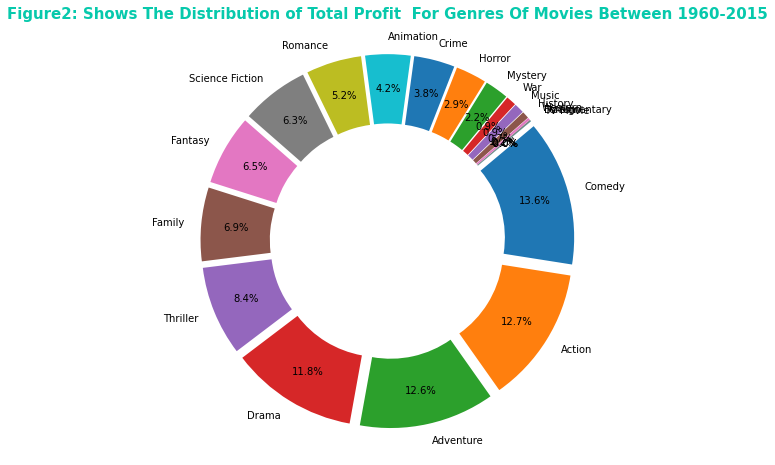

In [37]:
# Create variable contains the profit of genres on average:
sorted_profit = df_genre.groupby('genres').sum().profit.sort_values(ascending=False)
fig, ax = plt.subplots(figsize = (1.15*8.27,1.15*14.70))
plt.pie(sorted_profit, labels = sorted_profit.index, startangle = 40, counterclock = False,autopct='%1.1f%%',wedgeprops = {'width' : 0.4},
        pctdistance=0.80,explode =tuple(np.repeat(0.08,sorted_profit.shape[0])));
ax.set_title('Figure2: Shows The Distribution of Total Profit  For Genres Of Movies Between 1960-2015',fontweight='bold',color='#07C9AC',fontsize=15)
plt.tight_layout();



In [11]:
sorted_profit

genres
Comedy             3.483476e+10
Action             3.259825e+10
Adventure          3.233657e+10
Drama              3.030777e+10
Thriller           2.140581e+10
Family             1.758673e+10
Fantasy            1.676487e+10
Science Fiction    1.617173e+10
Romance            1.323380e+10
Animation          1.080909e+10
Crime              9.747145e+09
Horror             7.345955e+09
Mystery            5.650895e+09
War                2.408207e+09
Music              2.354070e+09
History            1.687800e+09
Western            5.622069e+08
Documentary        3.923744e+08
TV Movie          -2.423333e+06
Foreign           -5.298656e+07
Name: profit, dtype: float64

<p style="font-size:130%;color:purple"><strong>Interpretation:</strong></p>

<p style="font-size:110%;color:black"><strong>From figure2, we can observe that the genre of movies"Comedy" achieved the most total profit  between 1960 and 2015, second is "Action",third is "Adventure".Later, in question number 6, we will try to explore which genre of movies achieved the most likely total profit in the  period which achieved the most total profit of all movies</strong></p>


3- Which three of genres of movies achieved the most total voting public between 1960-2015?

### Let's explore visually the vote count on average for genres of movies :


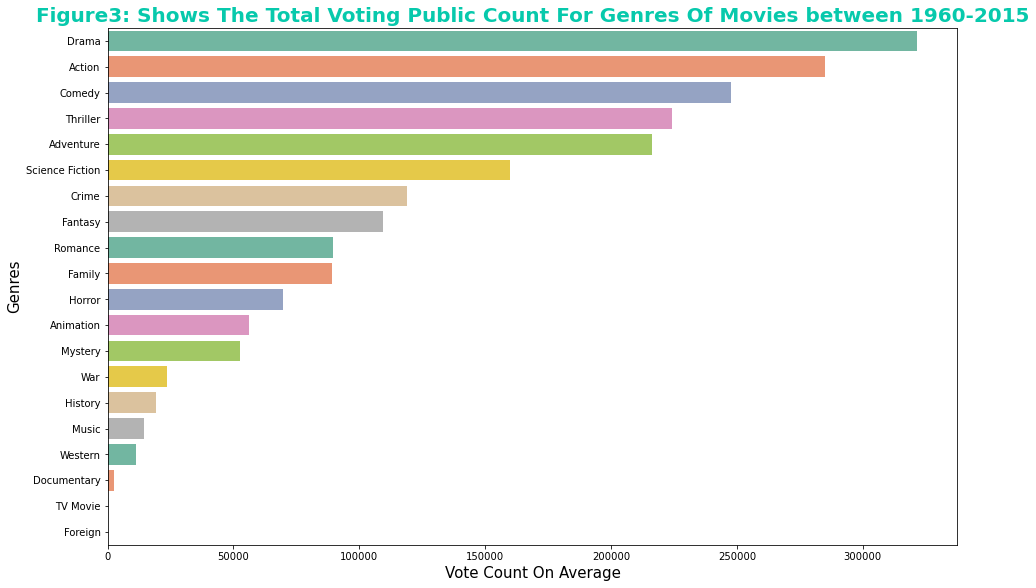

In [38]:
# Create variable contains the voting public of genres on average:
sorted_vote_count =   pd.DataFrame(df_genre.groupby('genres').sum().vote_count.sort_values(ascending=False).reset_index())

fig, ax = plt.subplots(figsize = (14.70,8.27))
ax = sns.barplot(x = "vote_count", y = "genres", data = sorted_vote_count, palette = "Set2")
plt.xlabel('Vote Count On Average', fontsize=15)
plt.ylabel("Genres", fontsize=15)
ax.set_title('Figure3: Shows The Total Voting Public Count For Genres Of Movies between 1960-2015',fontweight='bold',color='#07C9AC',fontsize=20)

plt.tight_layout();


In [39]:
sorted_vote_count

,genres,vote_count
0,Drama,321541.850000
1,Action,285148.866667
2,Comedy,247693.800000
3,Thriller,224348.733333
4,Adventure,216127.083333
5,Science Fiction,159847.583333
6,Crime,119045.916667
7,Fantasy,109268.116667
8,Romance,89466.533333
9,Family,89086.216667


<p style="font-size:130%;color:purple"><strong>Interpretation:</strong></p>

From figure3, we can observe that the genre of movies"Drama" achieved the most voting public  between 1960 and 2015, second is "Action",third is "Comedy".Later, in question number 7, we will try to explore which genre of movies achieved the most likely total voting count in the  period which achieved the most total voting count of all movies</b></font>

4- When did  the highest release of movies happen?

### Let's explore visually the production of genre of movies between 1960 and 2015 :


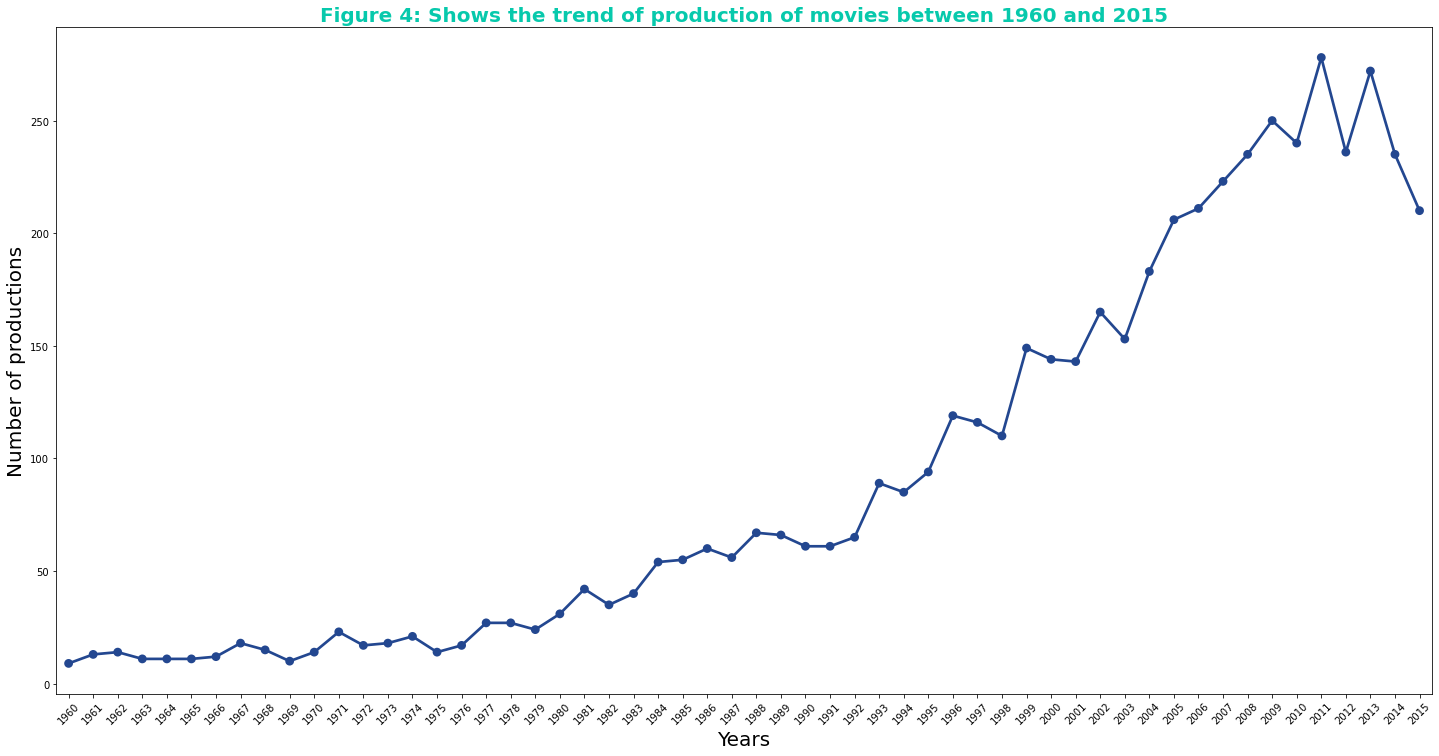

In [40]:
# Create dataset contains the number of production of movies:
data_released = pd.DataFrame(df.groupby('release_year')['id'].count().reset_index())
data_released.rename(columns = {'id':'number of production of movies'}, inplace = True)
plt.figure(figsize=(20,10))
x = data_released['release_year']
y = data_released['number of production of movies']
sns.pointplot(x=x, y=y, color='#234790')
plt.tight_layout()
plt.xlabel('Years', fontsize=20)
plt.ylabel("Number of productions", fontsize=20)
plt.title('Figure 4: Shows the trend of production of movies between 1960 and 2015',fontweight='bold',color='#07C9AC',fontsize=20)
plt.xticks(rotation =45 );

In [15]:
data_released.tail()

,release_year,number of production of movies
51,2011,278
52,2012,236
53,2013,272
54,2014,235
55,2015,210


<p style="font-size:130%;color:purple"><strong>Interpretation:</strong></p>

From figure4, we can observe that the trend of production of movies is increasing slightly between 1960 and 1993 and increasing sharply between 1993 and  2013 and decreasing sharply between 2013 and 2015, also we observe that the highest production of movies happend in 2011.


5-Is there a releationship between  voting public and profit for genres of movies?

##### Let's explore visually the relationship between Vote Count  and  profit and calculate  the Correlation Coefficient between  profit and vote count for all genres of movies:

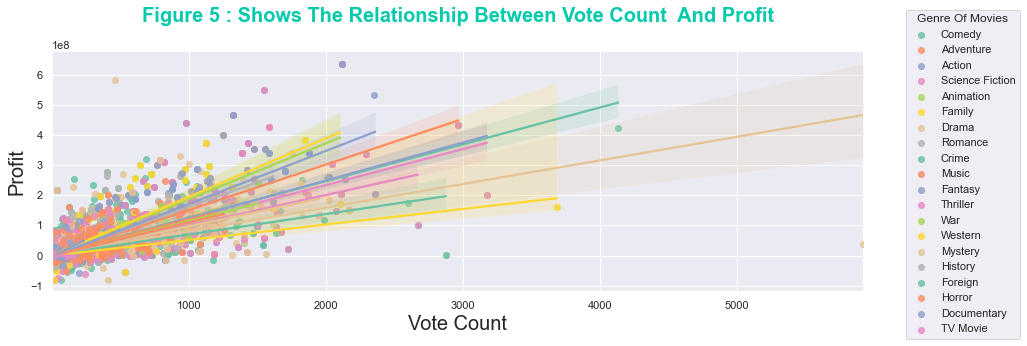

In [68]:

# Using sns.implot with fit_reg =True to draw the regression :
ax=sb.lmplot(x='vote_count', y='profit', hue='genres',
             data=df_genre.loc[df_genre['genres'].isin(['Adventure', 'Science Fiction', 
                                                     'Fantasy', 'Crime', 'Western', 'Family', 'Animation','War','Mystery',
                                                     'Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign'])],
             fit_reg=True,palette="Set2",aspect=3 ,legend=False)
ax = plt.gca()
ax.set_title("Figure 5 : Shows The Relationship Between Vote Count  And Profit",
             fontweight='bold',color='#07C9AC',fontsize=20,pad=30)
ax.set_xlabel("Vote Count",fontsize = 20)
ax.set_ylabel("Profit",fontsize = 20)
plt.legend(title='Genre Of Movies', loc='upper right',bbox_to_anchor=(1.2, 1.2))
plt.tight_layout();

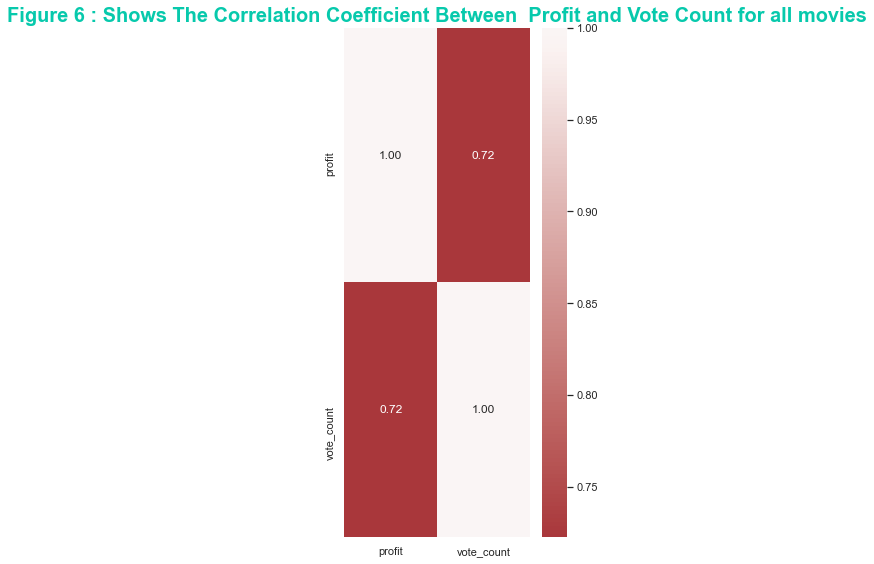

In [73]:
#Using .corr() function to calculate the Correlation and represent it with heatmap :
plt.subplot(1,2,1)
sns.set(rc={'figure.figsize':(14,8)})
ax=sb.heatmap(df_genre[['profit','vote_count']].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 1);
ax.set_title("Figure 6 : Shows The Correlation Coefficient Between  Profit and Vote Count for all movies",fontweight='bold',color='#07C9AC',fontsize=20)
plt.tight_layout();

<p style="font-size:130%;color:purple"><strong>Interpretation:</strong></p>


We found the positive relationship between Vote Count and profit and its strength is strong , thats mean the voting public for each movie does impact strongly on profit for each movie.The correlation = 0.72

6-Which genres of movies achieved the most likely total profit in the  period which achieved the most total profit of all movies?

#### First, let's drawing the trend of total profit of movies between 1960 and 2015 to explore which the  period  achieved the most total profit of all movies :

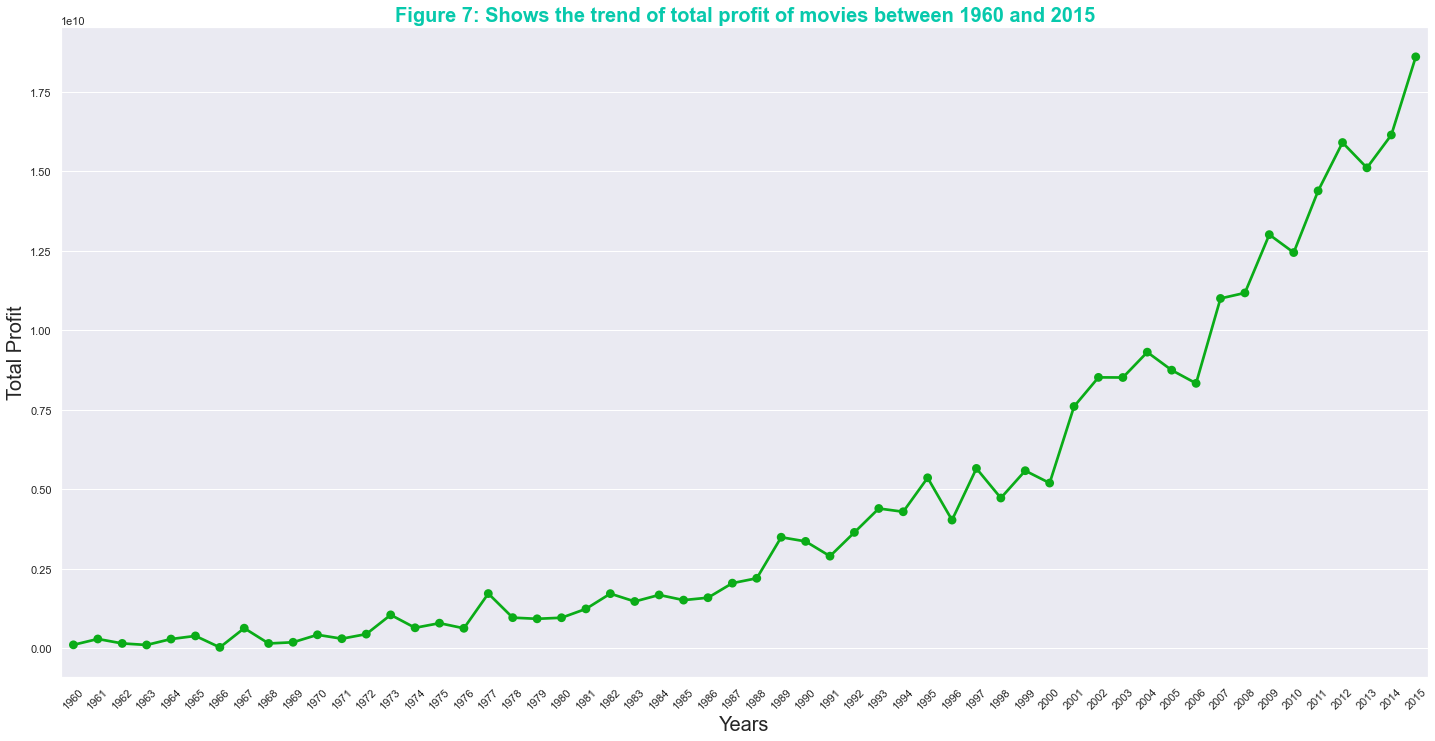

In [78]:
# Create dataset contains the total profit of movies for each year:
data_total_profit = pd.DataFrame(df.groupby('release_year')['profit'].sum().reset_index())
plt.figure(figsize=(20,10))
x = data_total_profit['release_year']
y = data_total_profit['profit']
sns.pointplot(x=x, y=y, color='#0BAC18')
plt.tight_layout()
plt.xlabel('Years', fontsize=20)
plt.ylabel("Total Profit", fontsize=20)
plt.title('Figure 7: Shows the trend of total profit of movies between 1960 and 2015',fontweight='bold',color='#07C9AC',fontsize=20)
plt.xticks(rotation =45 );

In [79]:
data_total_profit.tail()

,release_year,profit
51,2011,14390091595
52,2012,15910371980
53,2013,15114627742
54,2014,16149229219
55,2015,18606375244


<p style="font-size:130%;color:purple"><strong>Interpretation:</strong></p>

From figure7, we can observe that the trend of total profit of movies is increasing slightly between 1960 and 2000 and increasing sharply between 2000 and  2015, we can say the highest acheiving  of  total profit of movies happened between 2000 and 2015.

#### Now let's explore visually the  genre of movies which achieved the most likely total profit between 2000-2015 :

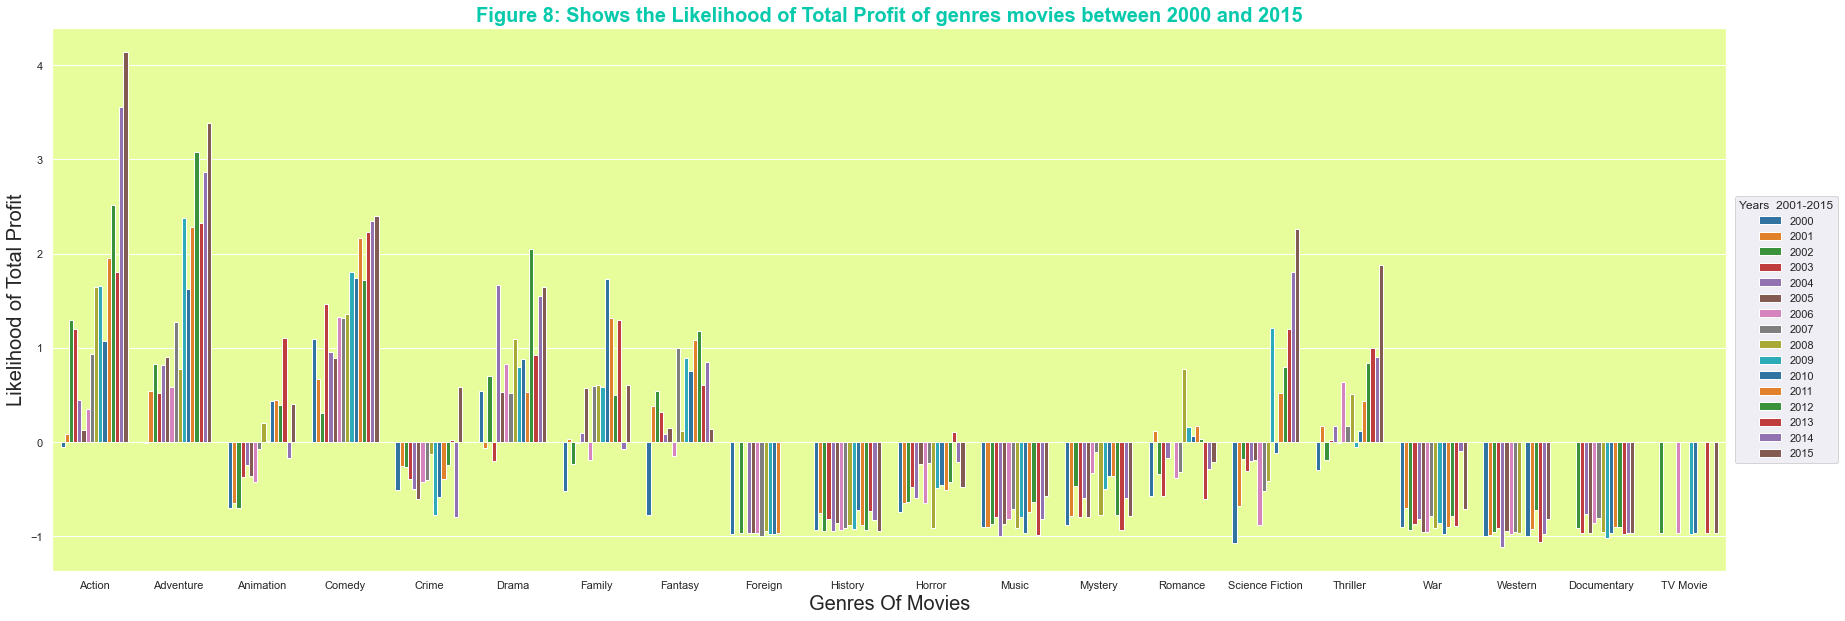

In [80]:
# Create dataset  between 2000-2015:
df_last_sixteen_years=df_genre.query('release_year>1999')
# Create dataset contains the total profit of movies between 2000-2015:
df_total_profit_last_sixteen_years=df_last_sixteen_years.groupby(['release_year', 'genres'])['profit'].sum().reset_index()
# insert column and calculate the likelihood of Total Profit of genres movies:
df_total_profit_last_sixteen_years['Likelihood of Total Profit']=(df_total_profit_last_sixteen_years['profit']-df_total_profit_last_sixteen_years['profit'].mean())/df_total_profit_last_sixteen_years['profit'].std(ddof=0)
fig,ax = plt.subplots()
ax.set(facecolor = "#E7FD9C")
fig.set_size_inches(30,10)
g = sb.barplot(x="genres", y="Likelihood of Total Profit", hue="release_year",data=df_total_profit_last_sixteen_years,palette=("tab10"))
plt.title('Figure 8: Shows the Likelihood of Total Profit of genres movies between 2000 and 2015',fontweight='bold',color='#07C9AC',fontsize=20)
plt.xlabel('Genres Of Movies', fontsize=20)
plt.ylabel("Likelihood of Total Profit", fontsize=20)
plt.legend(title='Years  2001-2015', loc='upper right',bbox_to_anchor=(1.07, 0.7));


In [82]:
df_total_profit_last_sixteen_years

,release_year,genres,profit,Likelihood of Total Profit
0,2000,Action,5.796035e+08,-0.050207
1,2000,Adventure,6.092504e+08,-0.003535
2,2000,Animation,1.701228e+08,-0.694834
3,2000,Comedy,1.308312e+09,1.096967
4,2000,Crime,2.900135e+08,-0.506096
5,2000,Drama,9.570400e+08,0.543975
6,2000,Family,2.847615e+08,-0.514364
7,2000,Fantasy,1.213419e+08,-0.771628
8,2000,Foreign,-7.814671e+06,-0.974953
9,2000,History,1.685692e+07,-0.936114


<p style="font-size:130%;color:purple"><strong>Interpretation:</strong></p>

From figure 8, we can observe that the genres of movies achieved the most likely total profit between 2000 to 2015 are "Action" ,"Adventure","Comedy","Drama" ,"Family" ,,"Animimation","Science Fiction and "Thriller",while the genres of movies achieved the least likely total profit between 2000 to 2015 are "Crime","Foreign","Horror","Music", "Mystery","War","Western","Romance",Documentary","History" and "TV Movie".

#### 7-Which genre of movies achieved the most likely total voting count in the  period which achieved the most total voting count of all movies?

#### First, let's drawing the trend of total Voting Count of movies between 1960 and 2015 to explore which the  period  achieved the most total voting count of all movies :

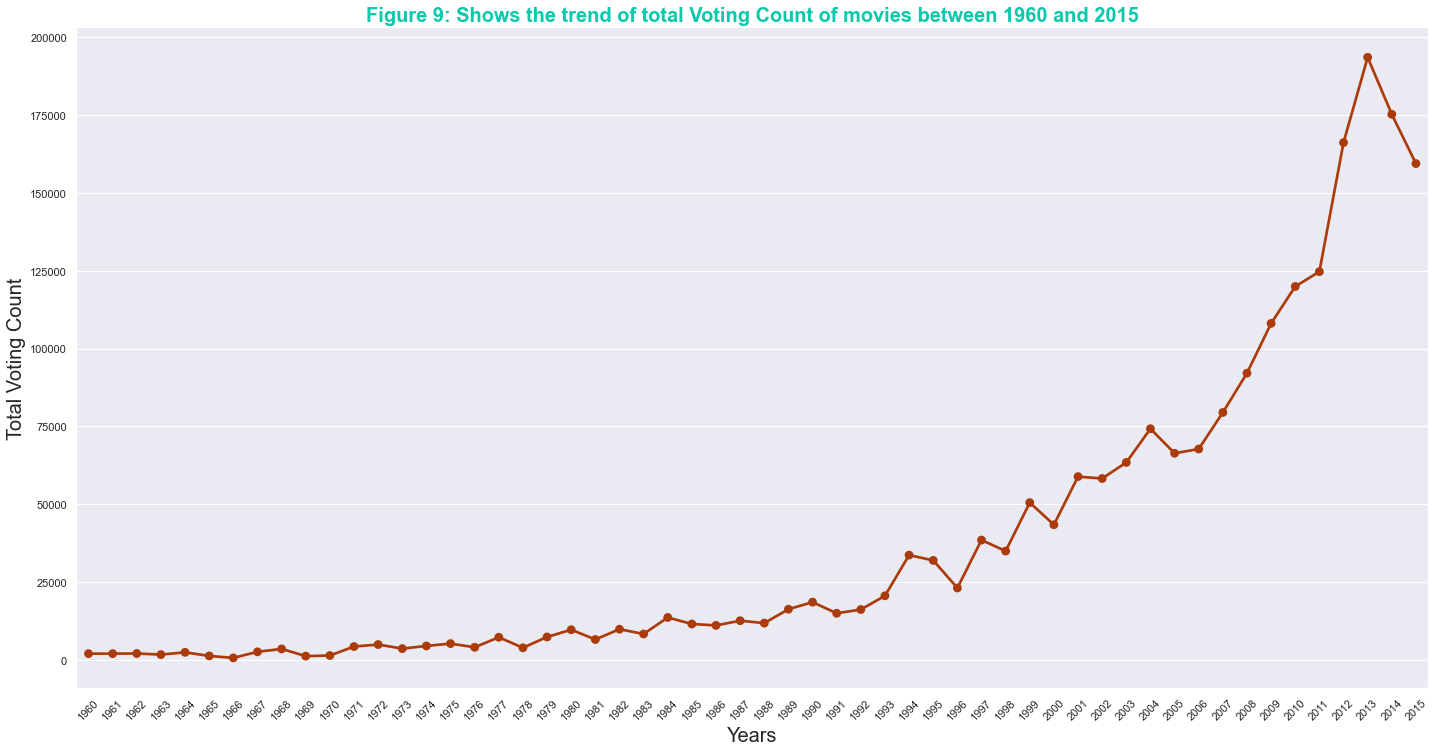

In [83]:
# Create dataset contains the total  Voting Count of movies for each year:
data_total_vote_count = pd.DataFrame(df.groupby('release_year')['vote_count'].sum().reset_index())
plt.figure(figsize=(20,10))
x = data_total_vote_count['release_year']
y = data_total_vote_count['vote_count']
sns.pointplot(x=x, y=y, color='#AC3B0B')
plt.tight_layout()
plt.xlabel('Years', fontsize=20)
plt.ylabel("Total Voting Count", fontsize=20)
plt.title('Figure 9: Shows the trend of total Voting Count of movies between 1960 and 2015',fontweight='bold',color='#07C9AC',fontsize=20)
plt.xticks(rotation =45 );

In [84]:
data_total_vote_count.tail()

,release_year,vote_count
51,2011,124671
52,2012,166105
53,2013,193468
54,2014,175188
55,2015,159367


<p style="font-size:130%;color:purple"><strong>Interpretation:</strong></p>

From figur 9, we can observe that the trend of total voting count of movies is increasing slightly between 1960 and 2007 and increasing sharply between 2007 and  2013 and dropping slightly, we can say the highest acheiving of  total voting count of movies happened between 2007 and 2015.

#### Now let's explore visually the  genre of movies which achieved the most likely total Voting Count between 2007-2015 :

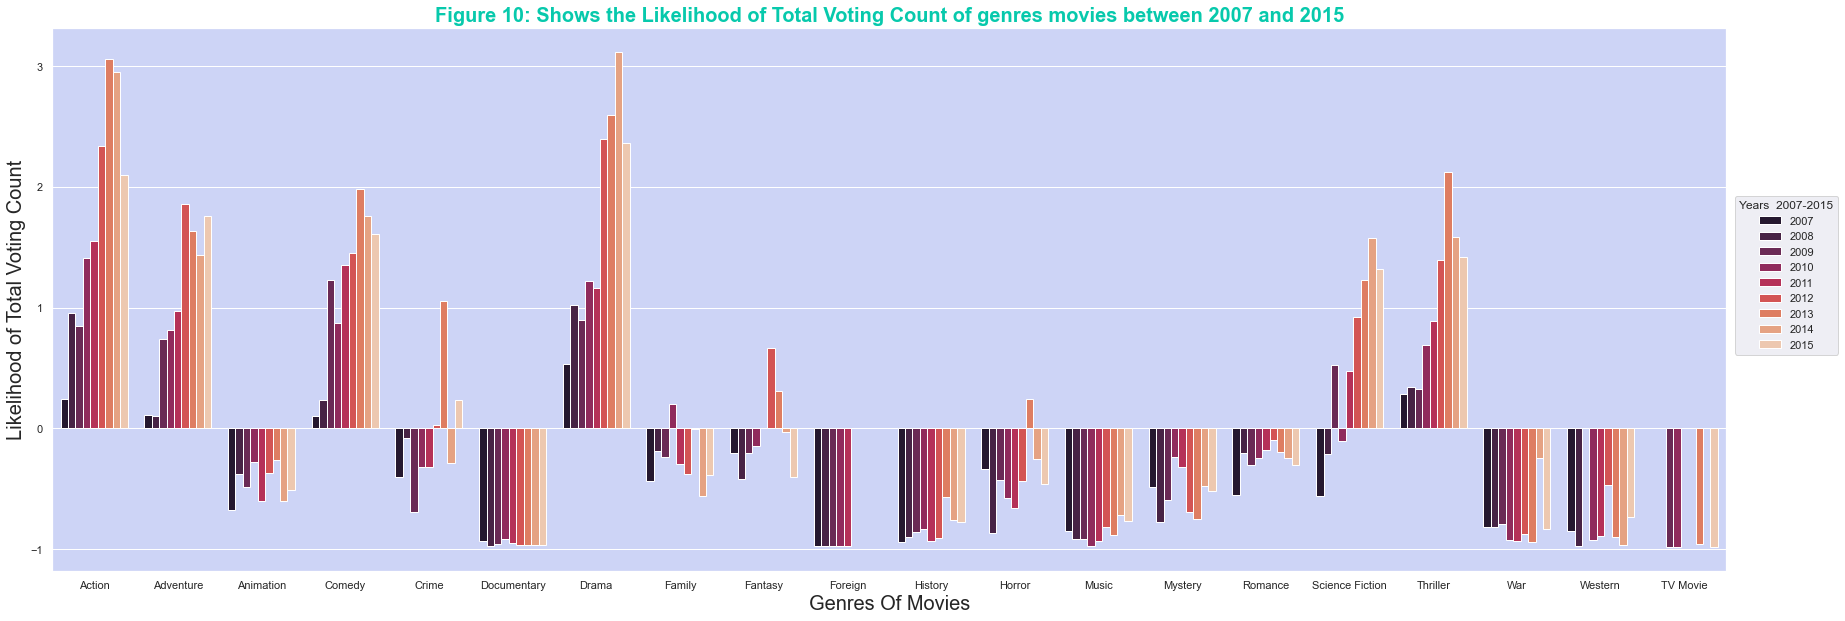

In [85]:
# Create dataset  between 2007-2015:
df_last_nine_years=df_genre.query('release_year>2006')
# Create dataset contains the total Voting Count  of movies between 2007-2015:
df_total_vote_count_last_nine_years=df_last_nine_years.groupby(['release_year', 'genres'])['vote_count'].sum().reset_index()
# insert column and calculate the likelihood of Total Voting Count of genres movies:
df_total_vote_count_last_nine_years['Likelihood of Total Voting Count']=(df_total_vote_count_last_nine_years['vote_count']-df_total_vote_count_last_nine_years['vote_count'].mean())/df_total_vote_count_last_nine_years['vote_count'].std(ddof=0)
fig,ax = plt.subplots()
fig.set_size_inches(30,10)
ax.set(facecolor = "#CDD4F6")
g = sb.barplot(x="genres", y="Likelihood of Total Voting Count", hue="release_year",data=df_total_vote_count_last_nine_years,palette=("rocket"))
plt.title('Figure 10: Shows the Likelihood of Total Voting Count of genres movies between 2007 and 2015',fontweight='bold',color='#07C9AC',fontsize=20)
plt.xlabel('Genres Of Movies', fontsize=20)
plt.ylabel("Likelihood of Total Voting Count", fontsize=20)
plt.legend(title='Years  2007-2015', loc='upper right',bbox_to_anchor=(1.07, 0.7));


In [87]:
df_total_vote_count_last_nine_years

,release_year,genres,vote_count,Likelihood of Total Voting Count
0,2007,Action,8976.933333,0.247098
1,2007,Adventure,7960.666667,0.108375
2,2007,Animation,2241.766667,-0.672268
3,2007,Comedy,7934.833333,0.104849
4,2007,Crime,4229.050000,-0.400999
5,2007,Documentary,334.000000,-0.932683
6,2007,Drama,11080.966667,0.534303
7,2007,Family,3980.100000,-0.434981
8,2007,Fantasy,5676.350000,-0.203439
9,2007,Foreign,21.666667,-0.975317


<p style="font-size:130%;color:purple"><strong>Interpretation:</strong></p>

From figure 10, we can observe that the genres of movies achieved the most likely total Voting Count  between 2007 to 2015 are "Action,"Adventure" ,"Comedy","Drama","Science Fiction"  and "Thriller",while the genres of movies achieved the least likely total Voting Count between 2007 to 2015 are "Family","Fantasy","Crime","Foreign","Horror","Music", "Mystery","War","Western","Animimation",Documentary","History" and "TV Movie".</font>


<a id='conclusion'></a>
## Conclusion and Limitations

### Conclusion:
>    
>Based on successful metrics: return on investment and rating by public, by Exploring our dataset,we have tried to answer the following questions:
>
>       
>1- Which three of genres of movies are the most  productive between 1960 and 2015?
>
>From figure1, we can observe that the genre of movies"Drama " is the most productive between 1960 and 2015, second is "Comedy",third is "Thriller", that means the investment  between 1960-2015 focused in general on genres of movies  "Drama", "Comedy",and "Thriller".
>    
>2- Which three of genres of movies achieved the most total profit  between 1960-2015?
>    
>From figure2, we can observe that the genre of movies"Comedy" achieved the most total profit  between 1960 and 2015, second is "Action",third is "Adventure".</b></font>
>    
>3- Which three of genres of movies achieved the most total voting public between 1960-2015?
>
>From figure3, we can observe that the genre of movies"Drama" achieved the most voting public  between 1960 and 2015, second is "Action",third is "Comedy".
>
>4- When did  the highest release of movies happen?
>
>From figure4, we can observe that the trend of production of movies is increasing slightly between 1960 and 1993 and increasing sharply between 1993 and  2013 and decreasing sharply between 2013 and 2015, also we observe that the highest production of movies happend in 2011.
> 
>5-Is there a releationship between  voting public and profit for genres of movies?
>
>from figure 5, we found the positive relationship between Vote Count and profit and its strength is strong , thats mean the voting public for each movie does impact strongly on profit for each movie.The correlation = 0.72.
>   
> 6-Which genres of movies achieved the most likely total profit in the  period which achieved the most total profit of all movies?
>    
>From figure7, we can observe that the trend of total profit of movies is increasing slightly between 1960 and 2000 and increasing sharply between 2000 and  2015, and we can observe from figure 8 that the genres of movies achieved the most likely total profit between 2000 to 2015 are "Action" ,"Adventure","Comedy","Drama" ,"Family" ,,"Animimation","Science Fiction and "Thriller",while the genres of movies achieved the least likely total profit between 2000 to 2015 are "Crime","Foreign","Horror","Music", "Mystery","War","Western","Romance",Documentary","History" and "TV Movie".
>
>7-Which genre of movies achieved the most likely total voting count in the  period which achieved the most total voting count of all movies?
>    
>From figure 9, we can observe that the trend of total voting count of movies is increasing slightly between 1960 and 2007 and increasing sharply between 2007 and  2013 and dropping slightly, and we can observe from figure 10 that the genres of movies achieved the most likely total Voting Count  between 2007 to 2015 are "Action,"Adventure" ,"Comedy","Drama","Science Fiction"  and "Thriller",while the genres of movies achieved the least likely total Voting Count between 2007 to 2015 are "Family","Fantasy","Crime","Foreign","Horror","Music", "Mystery","War","Western","Animimation",Documentary","History" and "TV Movie".
>
### Limitations:
>
>The analyzes contained in this project are inaccurate and unreliable for several reasons:
>
>1-We lost about 50% of dataset because we dropped zero from  runtime and budget colunms,I think it is not plausible that runtime and budget  are equal zero.
>
>2-Many movies are a mix of different type of genres, we create new dataset that contains genre for each movie and distribute profit and vote_count(subject  our project)  equally for each genre,we assume the distribution is equal,accutally, we don't know the percentage of representation each genre for each movie .
>
>3-We haven't made the considerations about revenue and budget of movie associated in terms of 2010 dollars,accounting for inflation overtime.
>   
>The analyzes contained in this project are useful only for educational purposes and not for purposes of presenting them for decision-making.